<h1><center>𝕸𝖊𝖙𝖆𝖑 𝕭𝖆𝖓𝖉𝖘 🇧​​​​​🇾​​​​​ 🇳​​​​​🇦​​​​​🇹​​​​​🇮​​​​​🇴​​​​​🇳​​​​​</center></h1>
<center>
1964 ~ 2016
<br>
<br>

**Introdução à Ciência dos Dados**

*Professor Luciano Barbosa*<br><br>

**Grupo**<br>
🤘 Arianne Macena [@annemacena](https://github.com/annemacena) - asm7@cin.ufpe.br<br>
🤘 Otávio Kamel [@otaviokamel](https://github.com/otaviokamel) - oackb@cin.ufpe.br
<br><br>
<img src="https://media.giphy.com/media/XcLpNX8NFvhAc/giphy.gif" align="center"></center>

# Visão Geral

Para o presente trabalho, foi escolhido o *dataset* "Metal Bands by Nation" com a finalidade de fazer uma análise de seus dados e aplicar técnicas de ciência de dados pontuadas em aula. O *dataset* possui dados sobre bandas do gênero "**Metal**" ao decorrer dos anos de **1964 até 2016**.

Os dados foram coletados do site [Metal Storm](http://metalstorm.net/). Além de uma lista de bandas de Metal, o site possui diversas informações sobre *reviews* de álbums, concertos e entrevistas.

A coleta de dados foi feita através de *web scraping* do site da Metal Storm e seu resultado foi hospedado no [Kaggle](https://www.kaggle.com/mrpantherson/metal-by-nation).

## Bibliotecas

In [367]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

### GeonamesCache

In [368]:
# Biblioteca que possui todos os nomes de países e continentes de acordo com a ISO
!pip install geonamescache

In [369]:
from geonamescache import GeonamesCache
from geonamescache.mappers import country

In [370]:
countries = GeonamesCache().get_countries_by_names()

### GeoPandas

In [371]:
!pip install geopandas
!pip install mapclassify

In [372]:
import fiona
import geopandas as gpd

## Importação e informações do *dataset*

In [373]:
# importando arquivo com dados do dataset escolhido
df = pd.read_csv('metal_bands_2017.csv', encoding='latin-1')

As colunas do *dataset* são compostas pelos seguintes dados:

*   **band_name**: Nome da banda.
*   **fans**: A quantidade de fãs a banda possui no site da Metal Storm.
*   **formed**: O ano que a banda foi formada.
*   **origin**: O país de onde a banda é.
*   **split**: O ano que a banda se separou.
*   **style**: O estilo ou subgênero da banda.



In [374]:
# visualizando as 5 primeiras linhas do dataset
df.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [375]:
# visualizando a dimensionalidade do dataset (linhas, colunas)
df.shape

(5000, 7)

In [376]:
df.describe()

,Unnamed: 0,fans
count,5000.000000,5000.000000
mean,2499.500000,87.805800
std,1443.520003,296.137523
min,0.000000,0.000000
25%,1249.750000,4.000000
50%,2499.500000,12.000000
75%,3749.250000,42.000000
max,4999.000000,4195.000000


In [377]:
df.describe(include='object')

,band_name,formed,origin,split,style
count,5000,5000,4992,5000,5000
unique,4949,53,113,50,1227
top,Emperor,2005,USA,-,Black
freq,2,270,1139,2215,345


# Pré-Processamento

## Tratamento	de	dados


### Dados faltantes

In [378]:
# a coluna Unnamed: 0 é apenas repetição do index do dataframe, vamos removê-la
df.drop(columns=['Unnamed: 0'], inplace=True)

In [379]:
df.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [380]:
# visualizando quantidade de dados por colunas que possuem dados faltantes
df.isna().sum()

band_name    0
fans         0
formed       0
origin       8
split        0
style        0
dtype: int64

A princípio, apenas a coluna 'origin' possui valores faltantes. Mas ao investigar o dataset mais a frente, veremos que existem alguns valores que foram preenchidos com um traço "-" para indicar a falta daquele atributo.

In [381]:
df[df['origin'].isna()]

,band_name,fans,formed,origin,split,style
460,Enshine,175,2009,NaN,-,Gothic doom
989,Clouds,61,2013,NaN,2013,Atmospheric doom
1422,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2614,Twilight Of The Gods,11,2010,NaN,-,Heavy
2996,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3444,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3941,Level 10,3,2014,NaN,2014,"Heavy,Power"
4201,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


In [382]:
# removendo linhas que possuem ano de origem faltante
df.dropna(inplace=True)

In [383]:
df.isna().sum()

band_name    0
fans         0
formed       0
origin       0
split        0
style        0
dtype: int64

### Dados duplicados

In [384]:
# verificando se existem nomes de bandas duplicados
df["band_name"].duplicated().sum()

51

In [385]:
df.shape

(4992, 6)

In [386]:
# removendo linhas com nome de banda duplicado
df.drop_duplicates(subset="band_name", keep='first', inplace=True)

In [387]:
df.shape

(4941, 6)

### Outros tratamentos

##### Removendo bandas sem data de criação

Linhas com o caractere "-" em qualquer coluna indica que aquele dado não está disponível. Na coluna "split" não precisa necessáriamente ser tratado mas na coluna "formed" sim pois não tem indicação de qual ano a banda foi criada.

In [388]:
df[df['formed'] == '-']

,band_name,fans,formed,origin,split,style
4442,Throes Of Sanity,2,-,USA,-,Us power
4599,Doomocracy,1,-,Greece,-,Doom
4821,Rustless,1,-,Italy,-,Heavy
4948,Weapon UK,1,-,United Kingdom,-,"New wave of british heavy,Heavy"


In [389]:
indexNaNFormed = df[df['formed'] == '-'].index
indexNaNFormed

Int64Index([4442, 4599, 4821, 4948], dtype='int64')

In [390]:
# como são poucas linhas, vamos removê-las
df.drop(indexNaNFormed , inplace=True)

In [391]:
df.shape

(4937, 6)

##### Separando subgêneros

A coluna "*style*" pode conter mais de um subgênero, então vamos dividí-los para que fique melhor a visualização

In [392]:
generos = df['style'].str.split(',', expand = True)
generos.count()

0    4937
1    2152
2     434
3      80
4      15
5       3
dtype: int64

In [393]:
df.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


Como as bandas podem ter até 5 subgêneros, mas nem a metade das bandas possui mais de 1 gênero. Então vamos manter pelo menos um subgênero principal e outro secundário.

In [394]:
df['main_style'] = generos[0]
df['secondary_style'] = generos[1]

df.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None


In [395]:
df.shape

(4937, 8)

##### Tratando país de origem

Os dados dos países de origem não estão padronizados de acordo com a [ISO 3166-1 alpha-3 ](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3), é necessário tratá-los.

Alguns exemplos de dados não tratados: "Canada, France", "Korean, South", etc. Vamos dividir esse dado e manter apenas o primeiro antes da vírgula.

In [396]:
df['origin'].value_counts()

USA                                1122
Sweden                              469
Germany                             392
United Kingdom                      338
Finland                             300
                                   ... 
Sweden, Finland                       1
Bosnia and Herzegovina, Croatia       1
Lithuania, United Kingdom             1
Canada, France                        1
Iran, Norway                          1
Name: origin, Length: 113, dtype: int64

In [397]:
df.shape

(4937, 8)

Como estaremos usando uma [biblioteca](https://github.com/yaph/geonamescache) que precisam dos dados dos países (coluna "origin") no padrão ISO, precisamos tratar os valores que não estão conforme este padrão.

In [398]:
# printa todos os países que não estão no padrão ISO
#sorted(set(df.origin.unique()) - set(countries.keys()))

Esse *dataset* tem um registro em específico com o dado da coluna "origin" igual à "South, Korean". Antes de fazermos o split dos dados da coluna "origin", vamos tratar esse registro individualmente.

In [399]:
df[df['origin'] == 'Korea, South']

,band_name,fans,formed,origin,split,style,main_style,secondary_style
2094,Jambinai,17,2009,"Korea, South",-,"Folk,Post-metal",Folk,Post-metal


In [400]:
df.loc[df['origin'] == 'Korea, South', 'origin'] = 'South Korea'

In [401]:
df[df['origin'].str.contains('Korea')]

,band_name,fans,formed,origin,split,style,main_style,secondary_style
2094,Jambinai,17,2009,South Korea,-,"Folk,Post-metal",Folk,Post-metal


In [402]:
# obtendo index das bandas que possuem dados da coluna "origin" mal formatados
indexes = []
for index, band in df.iterrows():
    cell_origin = band['origin']
    countries = cell_origin.split(',')
    if (len(countries) > 1):
        indexes.append(index)

In [403]:
df[df.index.isin(indexes)].head(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style
129,Motörhead,875,1975,"United Kingdom, USA",1975,Heavy,Heavy,None
147,Ozzy Osbourne,750,1979,"United Kingdom, USA",1979,Heavy,Heavy,None
159,King Diamond,641,1985,"Denmark, USA",1985,Heavy,Heavy,None
194,Mercyful Fate,525,1981,"Denmark, USA",-,"Heavy,First wave of black",Heavy,First wave of black
295,Melechesh,307,1993,"Israel, The Netherlands",1993,"Melodic black,Folk",Melodic black,Folk
319,Myrath,275,2001,"Tunisia, France",2001,"Progressive,Oriental folk",Progressive,Oriental folk
448,Inquisition,184,1988,"Colombia, USA",-,"Black,Thrash",Black,Thrash
459,Thy Catafalque,177,1998,"Hungary, United Kingdom",1998,Avantgarde black,Avantgarde black,None
545,Nightrage,138,2000,"Greece, Sweden",2000,Melodic death,Melodic death,None
557,Sinergy,134,1997,"Sweden, Finland",1997,"Heavy,Power",Heavy,Power


In [404]:
df["country"] = df['origin'].str.split(',').str[0]
df.shape

(4937, 9)

In [405]:
df[df.index.isin(indexes)].head(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country
129,Motörhead,875,1975,"United Kingdom, USA",1975,Heavy,Heavy,None,United Kingdom
147,Ozzy Osbourne,750,1979,"United Kingdom, USA",1979,Heavy,Heavy,None,United Kingdom
159,King Diamond,641,1985,"Denmark, USA",1985,Heavy,Heavy,None,Denmark
194,Mercyful Fate,525,1981,"Denmark, USA",-,"Heavy,First wave of black",Heavy,First wave of black,Denmark
295,Melechesh,307,1993,"Israel, The Netherlands",1993,"Melodic black,Folk",Melodic black,Folk,Israel
319,Myrath,275,2001,"Tunisia, France",2001,"Progressive,Oriental folk",Progressive,Oriental folk,Tunisia
448,Inquisition,184,1988,"Colombia, USA",-,"Black,Thrash",Black,Thrash,Colombia
459,Thy Catafalque,177,1998,"Hungary, United Kingdom",1998,Avantgarde black,Avantgarde black,None,Hungary
545,Nightrage,138,2000,"Greece, Sweden",2000,Melodic death,Melodic death,None,Greece
557,Sinergy,134,1997,"Sweden, Finland",1997,"Heavy,Power",Heavy,Power,Sweden


In [406]:
#sorted(set(df.country.unique()) - set(countries.keys()))

Mesmo depois do tratamento, alguns países ainda não estão no padrão. Vamos tratá-los individualmente e acrescentar o código ISO em todos os registros do *dataframe* para que esses dados possam ser usados posteriormente.

In [407]:
# função da lib geonamescache para mapear o código da iso dado o nome do país
mapper = country(from_key='name', to_key='iso3')

country_index = {}
country_index['Czech Republic'] = 'CZE'
country_index['Slovak Republic'] = 'SVK'
country_index['The Netherlands'] = 'NLD'
country_index['UAE'] = 'ARE'
country_index['USA'] = 'USA'
country_index['Swaziland'] = 'SZ'
country_index['Macedonia'] = 'MKD'

df['iso3'] = df.country.apply(lambda x: country_index.get(x, mapper(x)))
assert all(~df['iso3'].isna()) # confirmar que todos os registros possuem o dado da coluna "iso3"
df.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,United Kingdom,GBR
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Sweden,SWE
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,USA,USA
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,USA,USA
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None,Sweden,SWE


### Definição	de	tipos

In [408]:
# visualizando tipos de dados por coluna
df.dtypes

band_name          object
fans                int64
formed             object
origin             object
split              object
style              object
main_style         object
secondary_style    object
country            object
iso3               object
dtype: object

In [409]:
# ajustando tipos dos dados
df['band_name'] = df['band_name'].astype('string')
df['formed'] = df['formed'].astype('int64')
df['origin'] = df['origin'].astype('string')
df['style'] = df['style'].astype('string')
df['main_style'] = df['main_style'].astype('string')
df['secondary_style'] = df['secondary_style'].astype('string')
df['country'] = df['country'].astype('string')
df['iso3'] = df['iso3'].astype('string')

In [410]:
df.dtypes

band_name          string
fans                int64
formed              int64
origin             string
split              object
style              string
main_style         string
secondary_style    string
country            string
iso3               string
dtype: object

## Detectando *outliers*

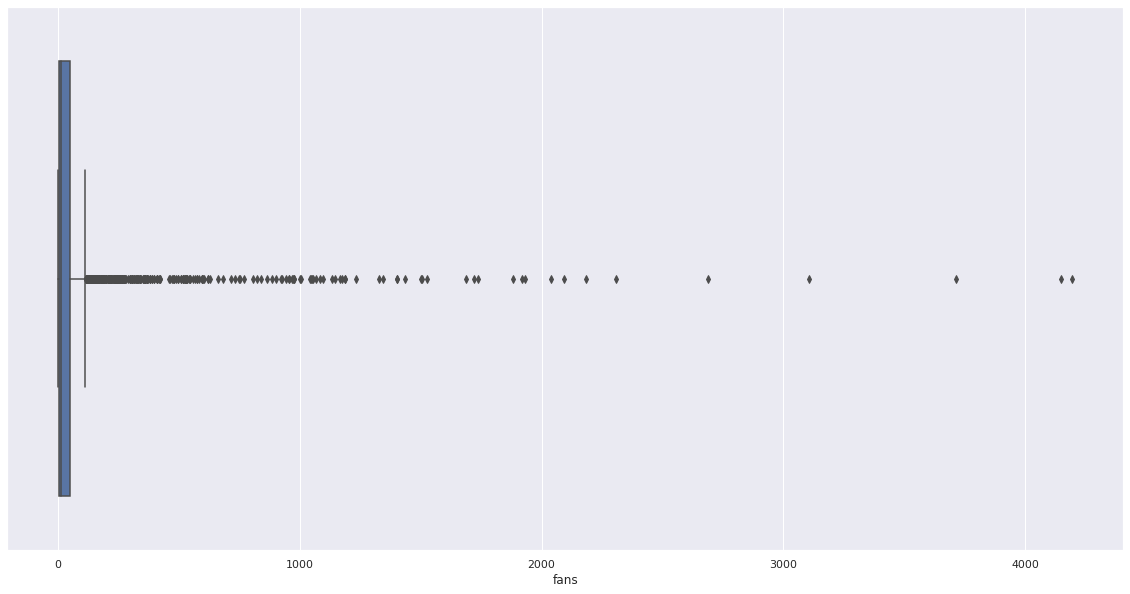

In [506]:
sns.boxplot(data=df, x='fans');

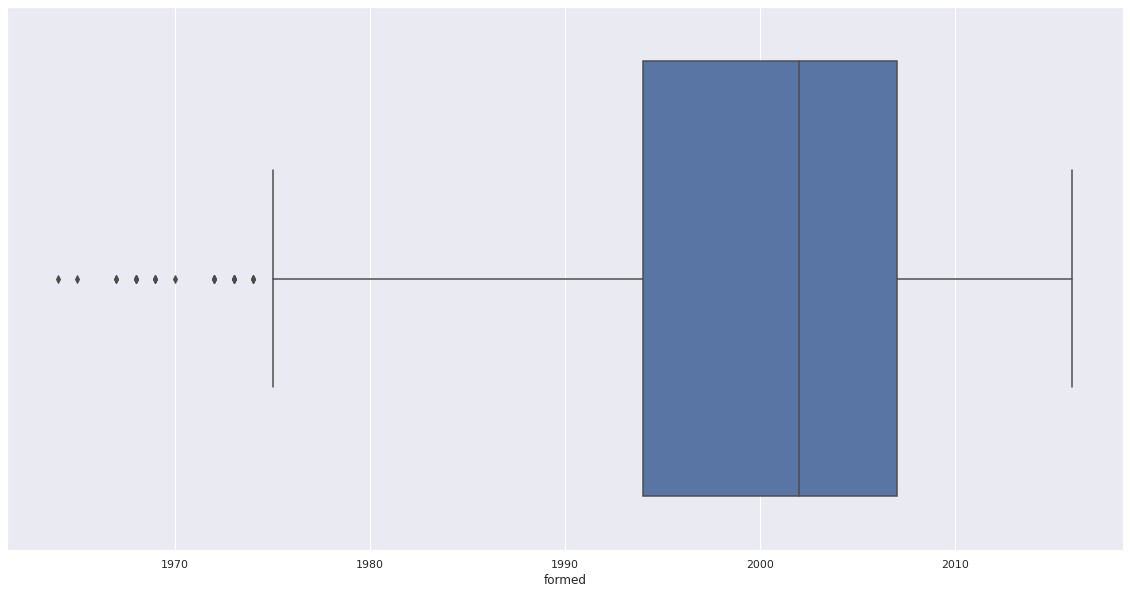

In [507]:
sns.boxplot(data=df, x='formed')

## Análises

### Tempo de Duração das Bandas

In [434]:
df[df['split'] == '-'].index

Int64Index([   0,    2,    4,    8,   10,   12,   18,   20,   22,   24,
            ...
            4978, 4980, 4982, 4984, 4986, 4988, 4990, 4992, 4994, 4996],
           dtype='int64', length=2183)

In [435]:
# para efeitos de comparação, bandas cujo ano de split é igual a "-" foram considerados bandas que ainda estão juntas
df_split = df.drop(df[df['split'] == '-'].index)
df_non_split = df.drop(df[df['split'] != '-'].index)

In [436]:
df_split.shape

(2754, 12)

In [437]:
df_non_split.shape

(2183, 12)

In [438]:
# como as bandas cujo valor de split é igual a "-" consideramos como ainda em andamento, colocaremos o ano de 2017 (pois os valores do dataset vão até 2016), para considerar o tempo que as bandas estão juntas

In [439]:
df_non_split['split'].sample(10)

3918    -
2490    -
4868    -
10      -
3110    -
2222    -
424     -
3962    -
738     -
314     -
Name: split, dtype: object

In [440]:
df_non_split['split'] = 2017

In [441]:
df_non_split['split'].sample(10)

4072    2017
3008    2017
3492    2017
4218    2017
2250    2017
3354    2017
3542    2017
1908    2017
3064    2017
4522    2017
Name: split, dtype: int64

In [442]:
df_split['split'].sample(10)

1381    1999
33      1985
3679    2001
2633    2005
739     1988
4787    2008
4547    2009
4649    2007
323     1980
3113    2009
Name: split, dtype: object

In [443]:
df_non_split['split'].sample(10)

3328    2017
2358    2017
170     2017
974     2017
3604    2017
2544    2017
4596    2017
3912    2017
1042    2017
1746    2017
Name: split, dtype: int64

In [444]:
df_split['split'] = df_split['split'].astype('int64')
df_split['formed'] = df_split['formed'].astype('int64')

In [445]:
df_split['band_duration'] = df_split['split'] - df_split['formed']

In [446]:
df_split.sample(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3,formed_normalizado,fans_normalizado,band_duration
4147,Barús,2,2015,France,2015,Progressive death,Progressive death,<NA>,France,FRA,0.980769,-0.243243,0
1987,Scanner,19,1986,Germany,1986,Power,Power,<NA>,Germany,DEU,0.423077,0.216216,0
1637,Khanate,27,2000,USA,2000,"Extreme sludge,Doom",Extreme sludge,Doom,USA,USA,0.692308,0.432432,0
3005,Beatrik,7,1998,Italy,1998,"Black,Doom",Black,Doom,Italy,ITA,0.653846,-0.108108,0
1355,Burst,37,1993,Sweden,1993,"Progressive metalcore,Hardcore,Post-hardcore ,...",Progressive metalcore,Hardcore,Sweden,SWE,0.557692,0.702703,0
783,Northern Kings,86,2007,Finland,2007,Symphonic,Symphonic,<NA>,Finland,FIN,0.826923,2.027027,0
1225,Waylander,44,1993,United Kingdom,1993,Celtic folk,Celtic folk,<NA>,United Kingdom,GBR,0.557692,0.891892,0
3735,Shepherds Of Cassini,4,2012,New Zealand,2012,"Post-metal,Progressive rock",Post-metal,Progressive rock,New Zealand,NZL,0.923077,-0.189189,0
2265,Xystus,15,1998,The Netherlands,1998,Progressive power,Progressive power,<NA>,The Netherlands,NLD,0.653846,0.108108,0
917,WarCry,69,2001,Spain,2001,Power,Power,<NA>,Spain,ESP,0.711538,1.567568,0


In [447]:
df_non_split['band_duration'] = df_non_split['split'] - df_non_split['formed']

In [448]:
df_non_split.sample(10)

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3,formed_normalizado,fans_normalizado,band_duration
1444,Age Of Silence,33,2004,Norway,2017,Avantgarde,Avantgarde,<NA>,Norway,NOR,0.769231,0.594595,13
3166,Big End Bolt,6,2007,Russia,2017,Brutal death,Brutal death,<NA>,Russia,RUS,0.826923,-0.135135,10
2766,Ebony Ark,9,2002,Spain,2017,"Power,Progressive",Power,Progressive,Spain,ESP,0.730769,-0.054054,15
1026,Holy Moses,58,1980,Germany,2017,Thrash,Thrash,<NA>,Germany,DEU,0.307692,1.270270,37
660,Violator,108,2002,Brazil,2017,Thrash,Thrash,<NA>,Brazil,BRA,0.730769,2.621622,15
3294,Steve Grimmett's Grim Reaper,6,2006,United Kingdom,2017,Heavy,Heavy,<NA>,United Kingdom,GBR,0.807692,-0.135135,11
760,Machinae Supremacy,89,2000,Sweden,2017,Power,Power,<NA>,Sweden,SWE,0.692308,2.108108,17
2686,Heidra,10,2006,Denmark,2017,Viking folk,Viking folk,<NA>,Denmark,DNK,0.807692,-0.027027,11
1892,Rise Of Avernus,21,2010,Australia,2017,"Progressive gothic,Progressive doom",Progressive gothic,Progressive doom,Australia,AUS,0.884615,0.270270,7
3870,Down Among The Dead Men,3,2013,Sweden,2017,Death,Death,<NA>,Sweden,SWE,0.942308,-0.216216,4


#### Bandas que terminaram

In [449]:
df_split['band_duration'].mean()

1.0777051561365287

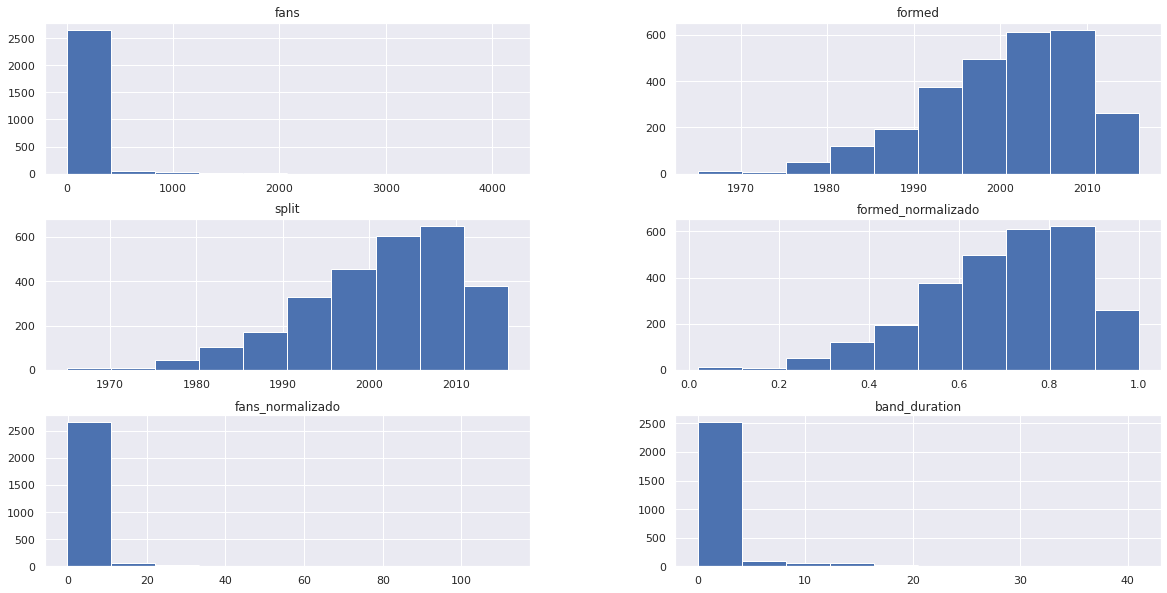

In [450]:
df_split.hist();

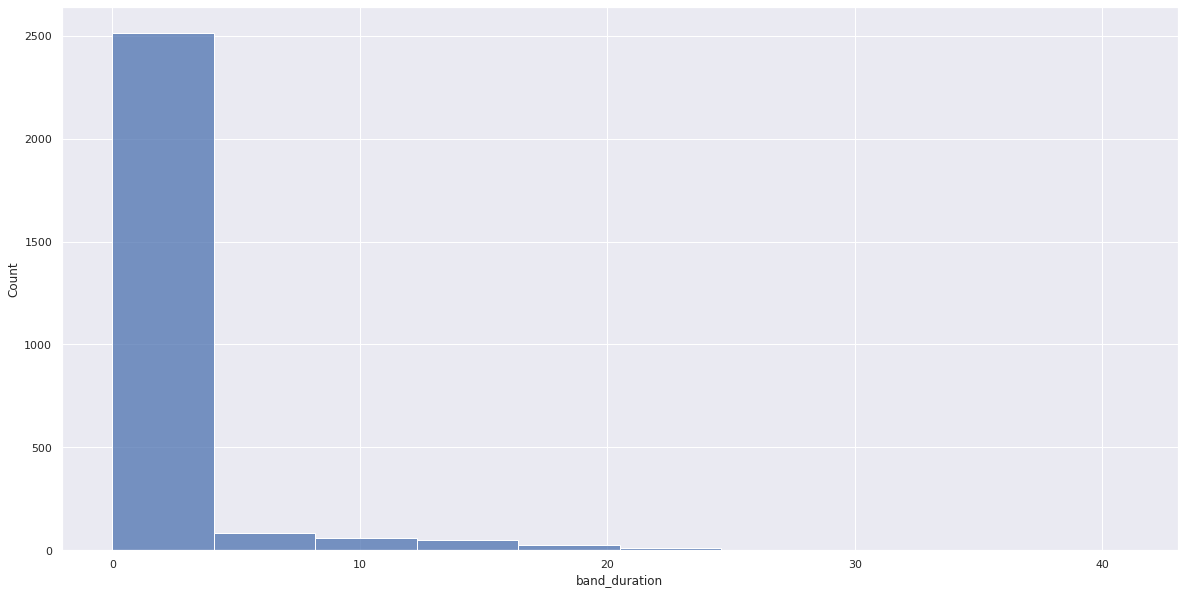

In [451]:
sns.histplot(data=df_split, x='band_duration', bins=10);

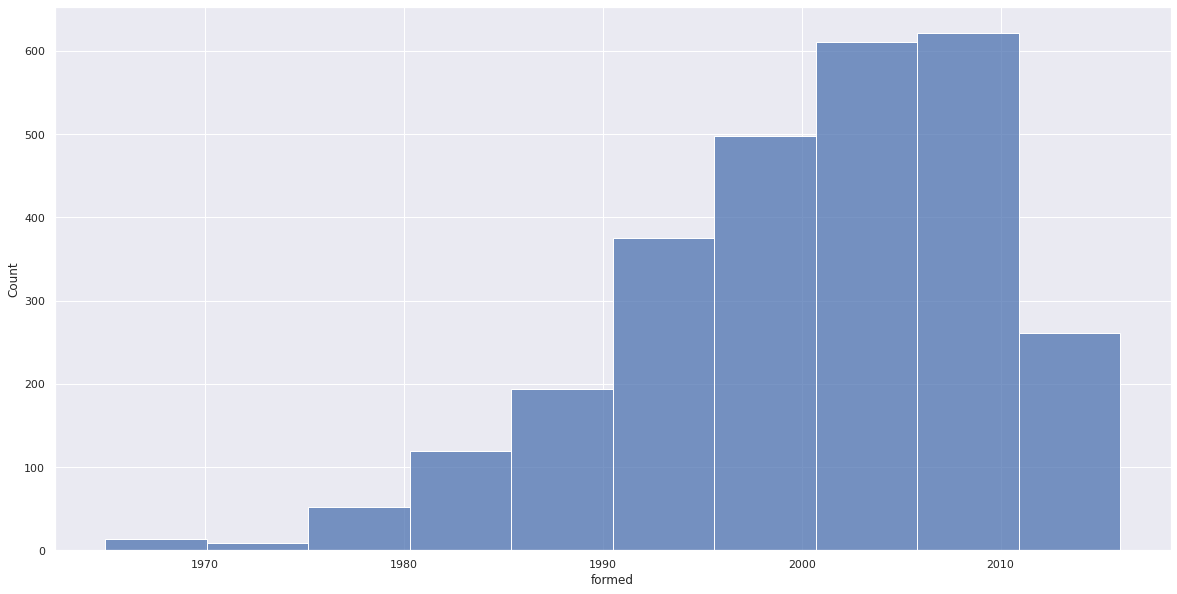

In [452]:
sns.histplot(data=df_split, x='formed', bins=10);

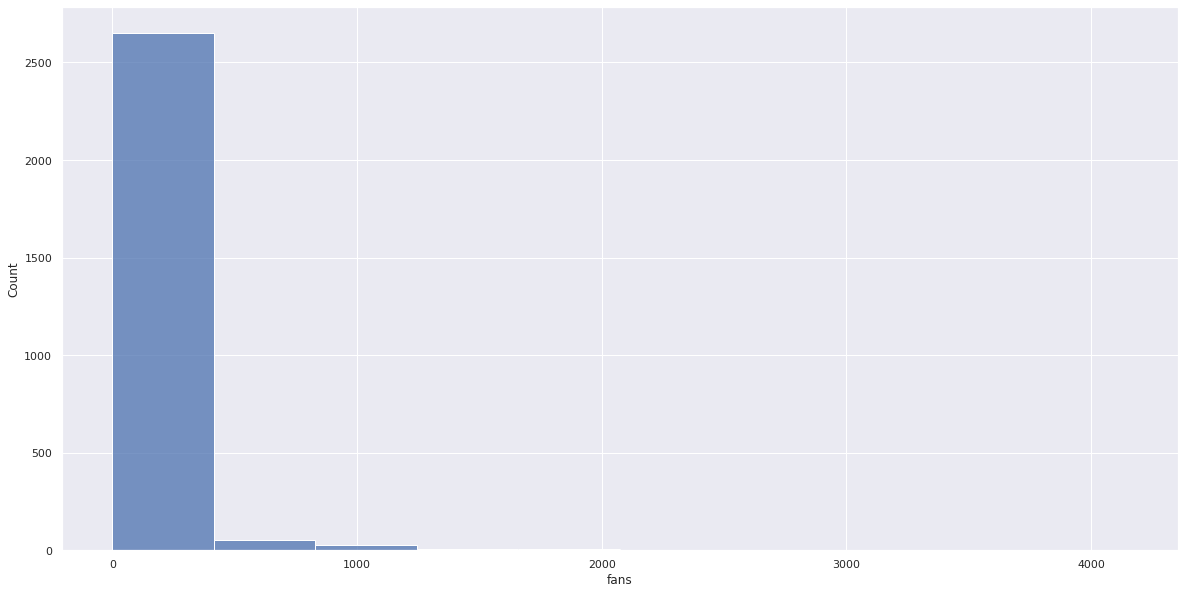

In [453]:
sns.histplot(data=df_split, x='fans', bins=10);

#### Bandas que continuam na ativa

In [454]:
df_non_split['band_duration'].mean()

16.154374713696747

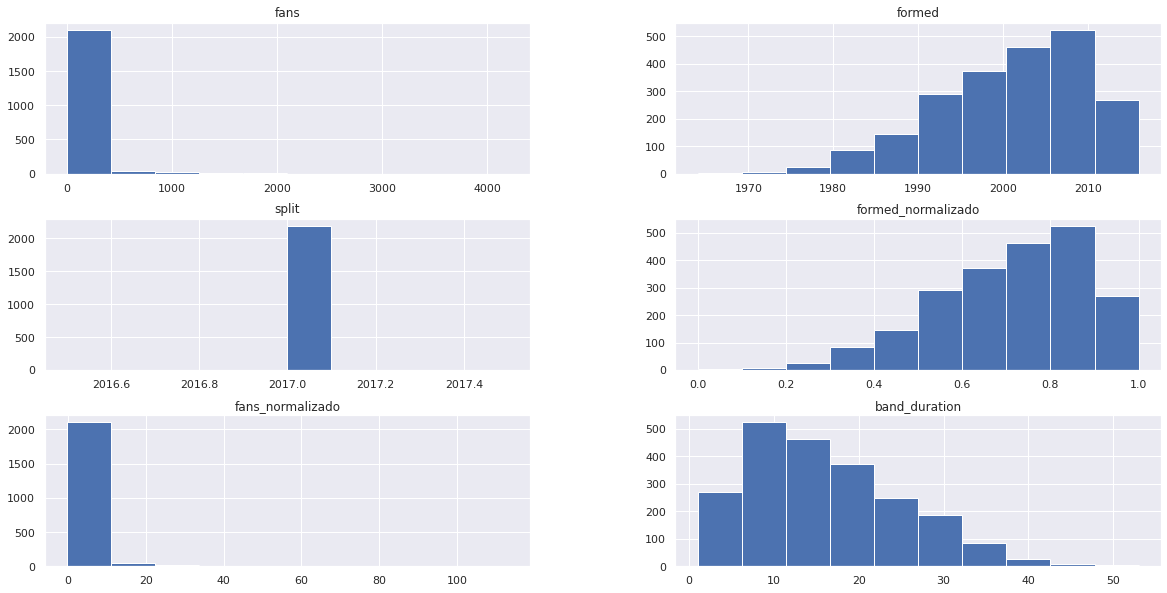

In [455]:
df_non_split.hist();

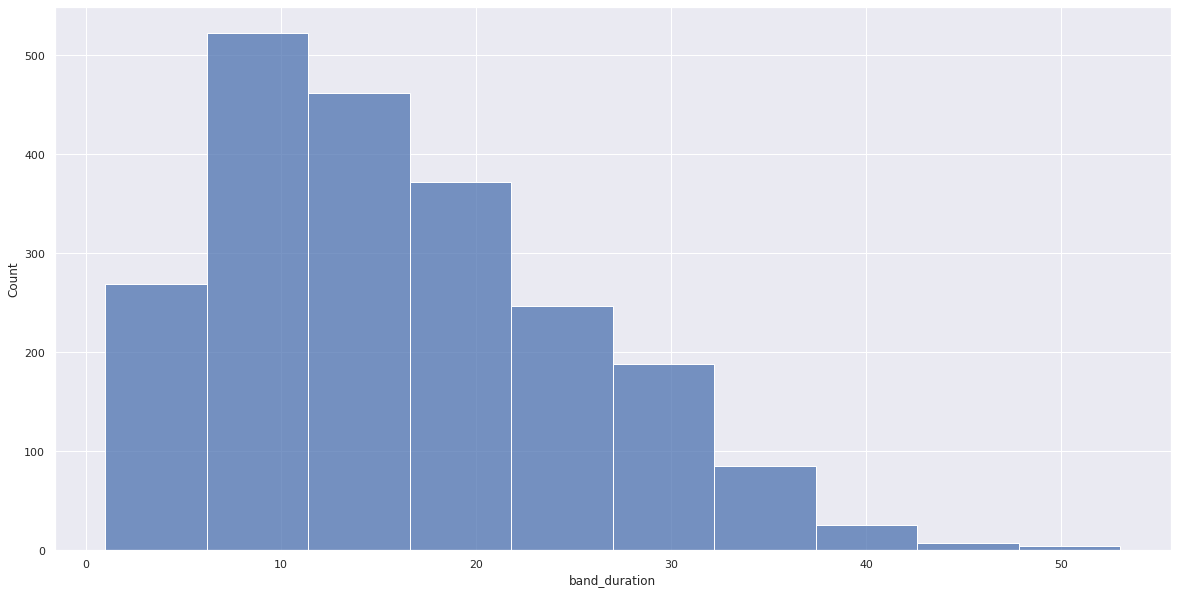

In [456]:
sns.histplot(data=df_non_split, x='band_duration', bins=10);

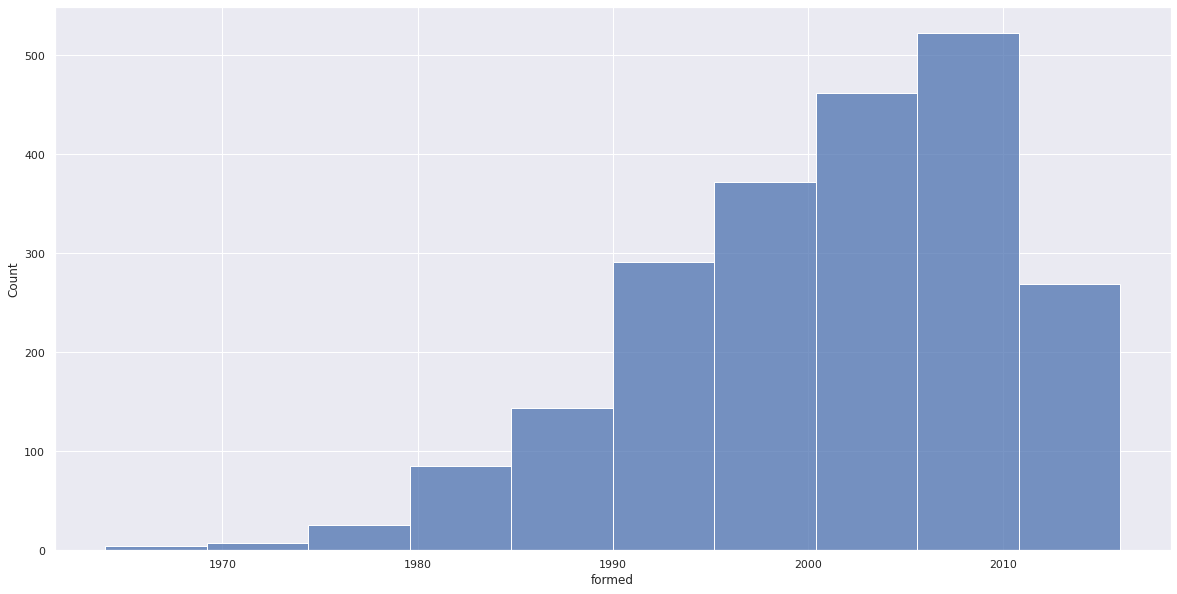

In [457]:
sns.histplot(data=df_non_split, x='formed', bins=10);

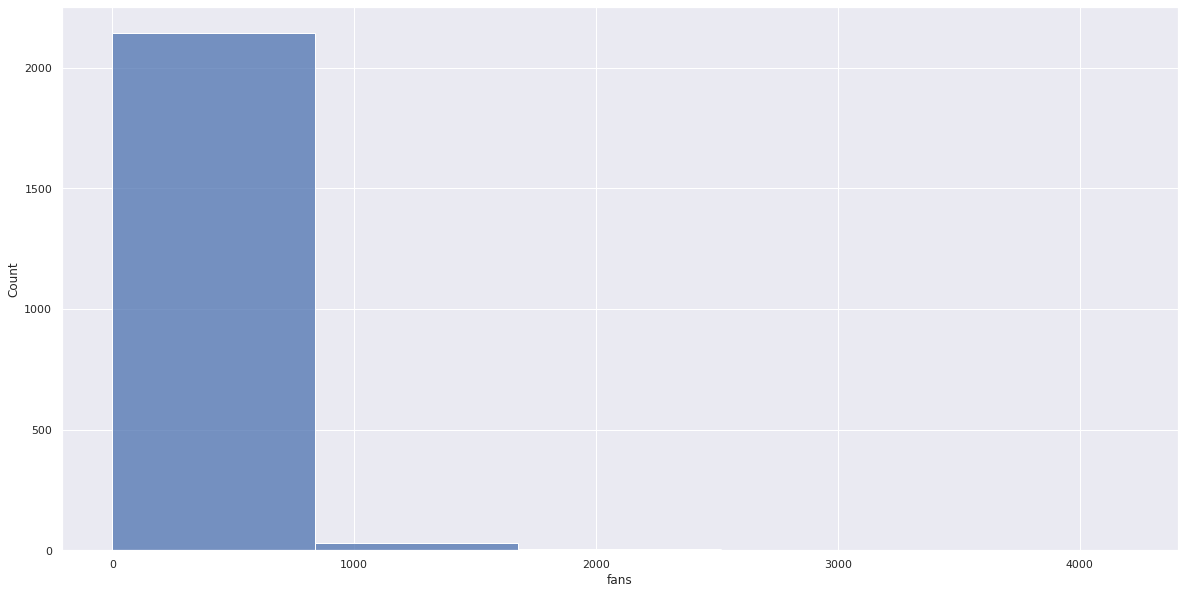

In [458]:
sns.histplot(data=df_non_split, x='fans', bins=5);

### Número de Fãs

In [459]:
df_fans_by_country = df[['origin', 'fans']].groupby('origin').mean().reset_index().sort_values('fans', ascending=False)
df_fans_by_country

,origin,fans
28,"Denmark, USA",583.000000
111,"United Kingdom, USA",561.333333
54,"Israel, The Netherlands",307.000000
1,Andorra,279.000000
102,"Tunisia, France",275.000000
...,...,...
0,Albania,2.000000
56,"Italy, Spain",1.000000
80,"Poland, Sweden",1.000000
112,Venezuela,1.000000


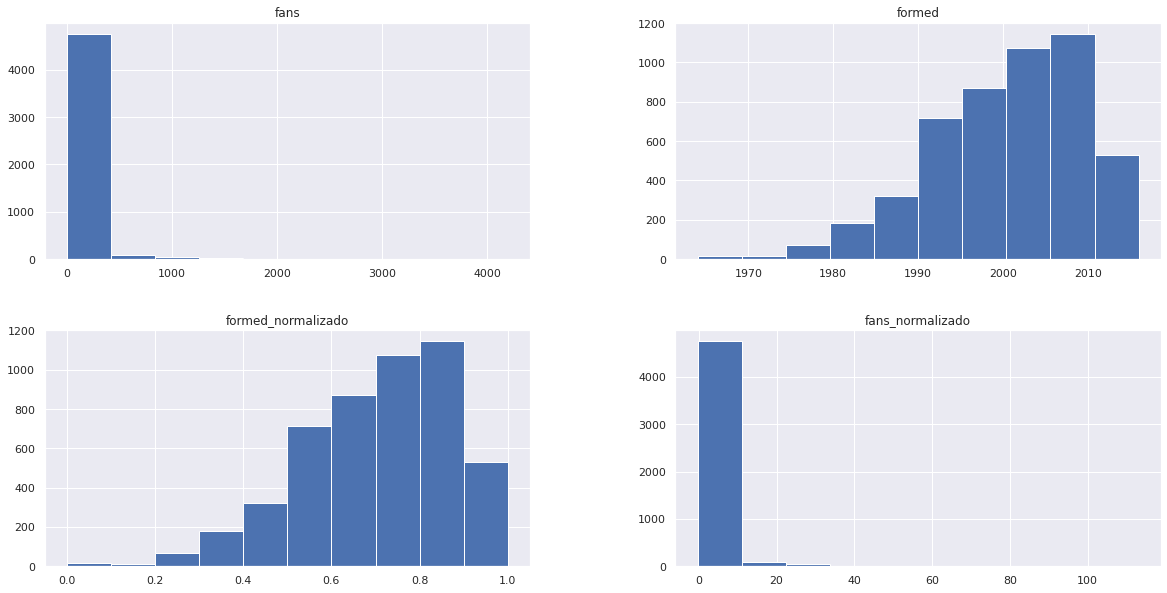

In [460]:
df.hist();

In [463]:
df.dropna(inplace=True)

In [464]:
dropar_index = df[df['formed'] == '-'].index

In [465]:
df.drop(dropar_index, axis=0, inplace=True)

In [466]:
df['formed'] = df['formed'].astype('int64')

In [467]:
df.corr(method='pearson')

,fans,formed,formed_normalizado,fans_normalizado
fans,1.000000,-0.290864,-0.290864,1.000000
formed,-0.290864,1.000000,1.000000,-0.290864
formed_normalizado,-0.290864,1.000000,1.000000,-0.290864
fans_normalizado,1.000000,-0.290864,-0.290864,1.000000


In [468]:
df.corr(method='kendall')

,fans,formed,formed_normalizado,fans_normalizado
fans,1.000000,-0.284745,-0.284745,1.000000
formed,-0.284745,1.000000,1.000000,-0.284745
formed_normalizado,-0.284745,1.000000,1.000000,-0.284745
fans_normalizado,1.000000,-0.284745,-0.284745,1.000000


In [469]:
df.corr(method='spearman')

,fans,formed,formed_normalizado,fans_normalizado
fans,1.000000,-0.403054,-0.403054,1.000000
formed,-0.403054,1.000000,1.000000,-0.403054
formed_normalizado,-0.403054,1.000000,1.000000,-0.403054
fans_normalizado,1.000000,-0.403054,-0.403054,1.000000


# Visualização de dados

In [510]:
df.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3,formed_normalizado,fans_normalizado
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,United Kingdom,GBR,0.211538,113.081081
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Sweden,SWE,0.500000,111.783784
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,USA,USA,0.326923,100.027027
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,USA,USA,0.365385,83.621622
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash",Progressive death,Death,USA,USA,0.365385,72.405405


In [530]:
top_styles = df[['main_style', 'fans']].groupby('main_style').sum().sort_values(by='fans', ascending=False).reset_index()
top_styles

,main_style,fans
0,Heavy,19182
1,Death,15622
2,Black,11694
3,Melodic death,7509
4,Progressive,7474
...,...,...
158,Epic doom,2
159,Noise,1
160,Atmospheric,1
161,Experimental rock,1


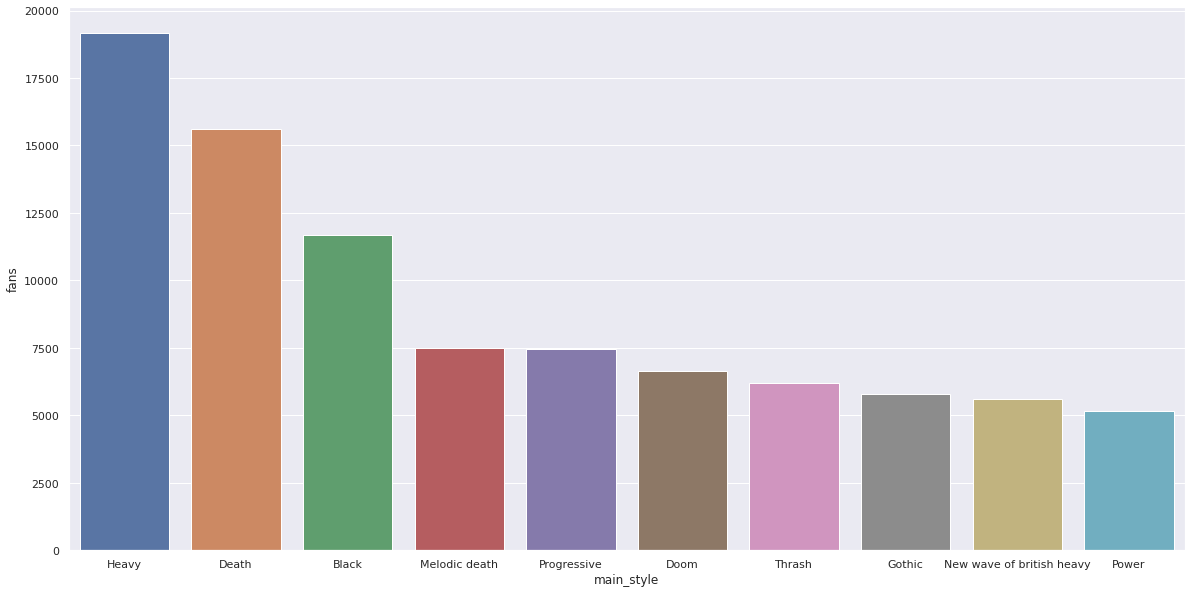

In [533]:
sns.barplot(data=top_styles.head(10), x='main_style', y='fans');

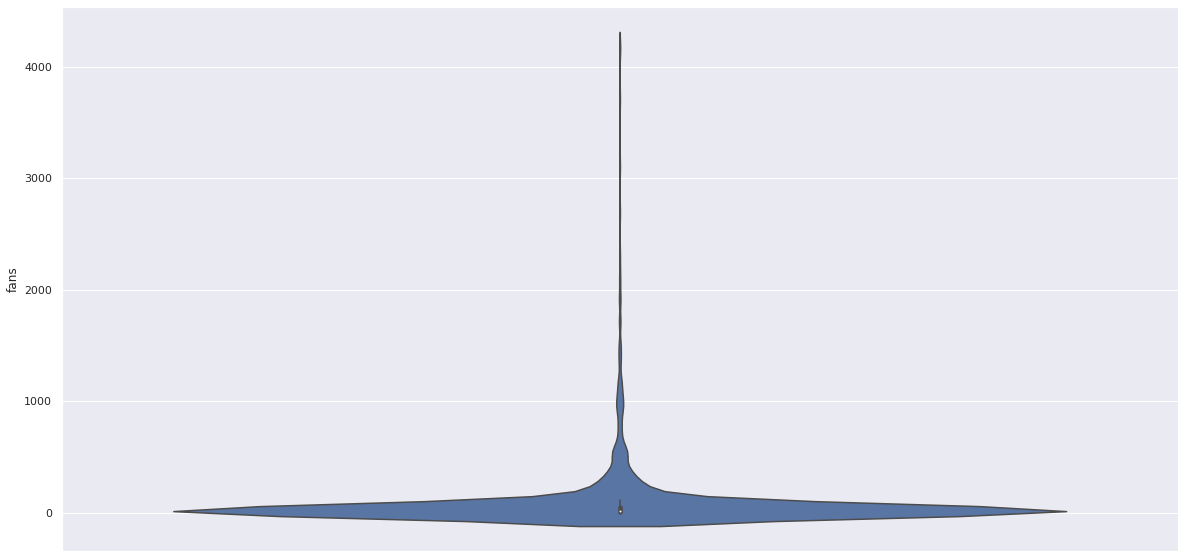

In [534]:
sns.violinplot(data=df, y='fans')

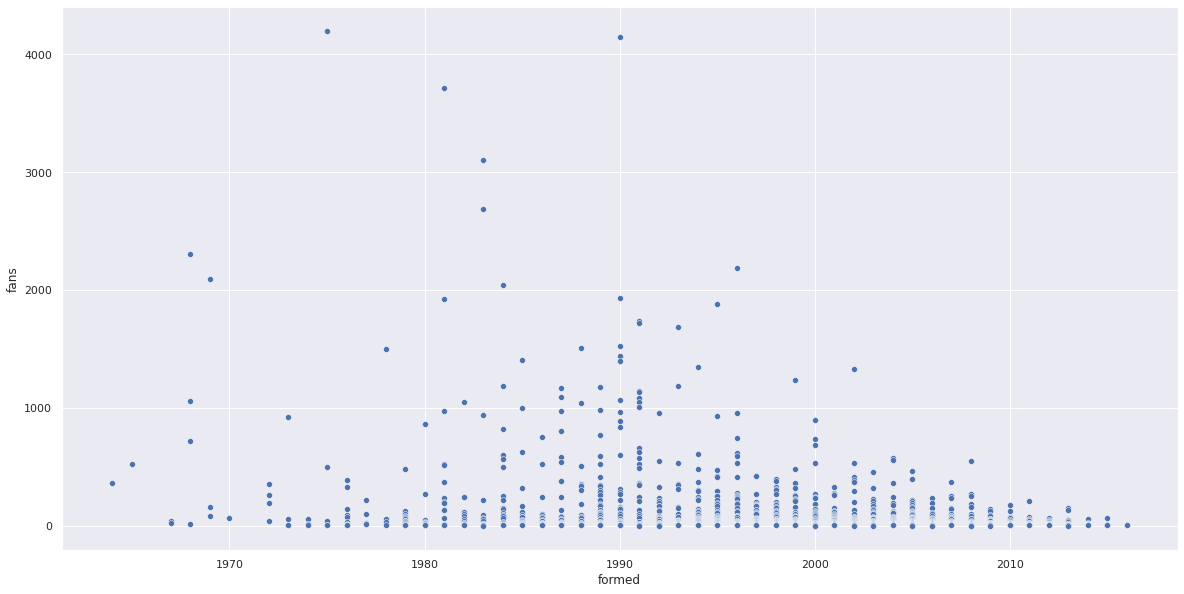

In [499]:
sns.scatterplot(data=df, x='formed', y='fans');

In [493]:
# pegando a ordem de número de bandas por países, do maior para o menor
ordem = df['origin'].value_counts().index

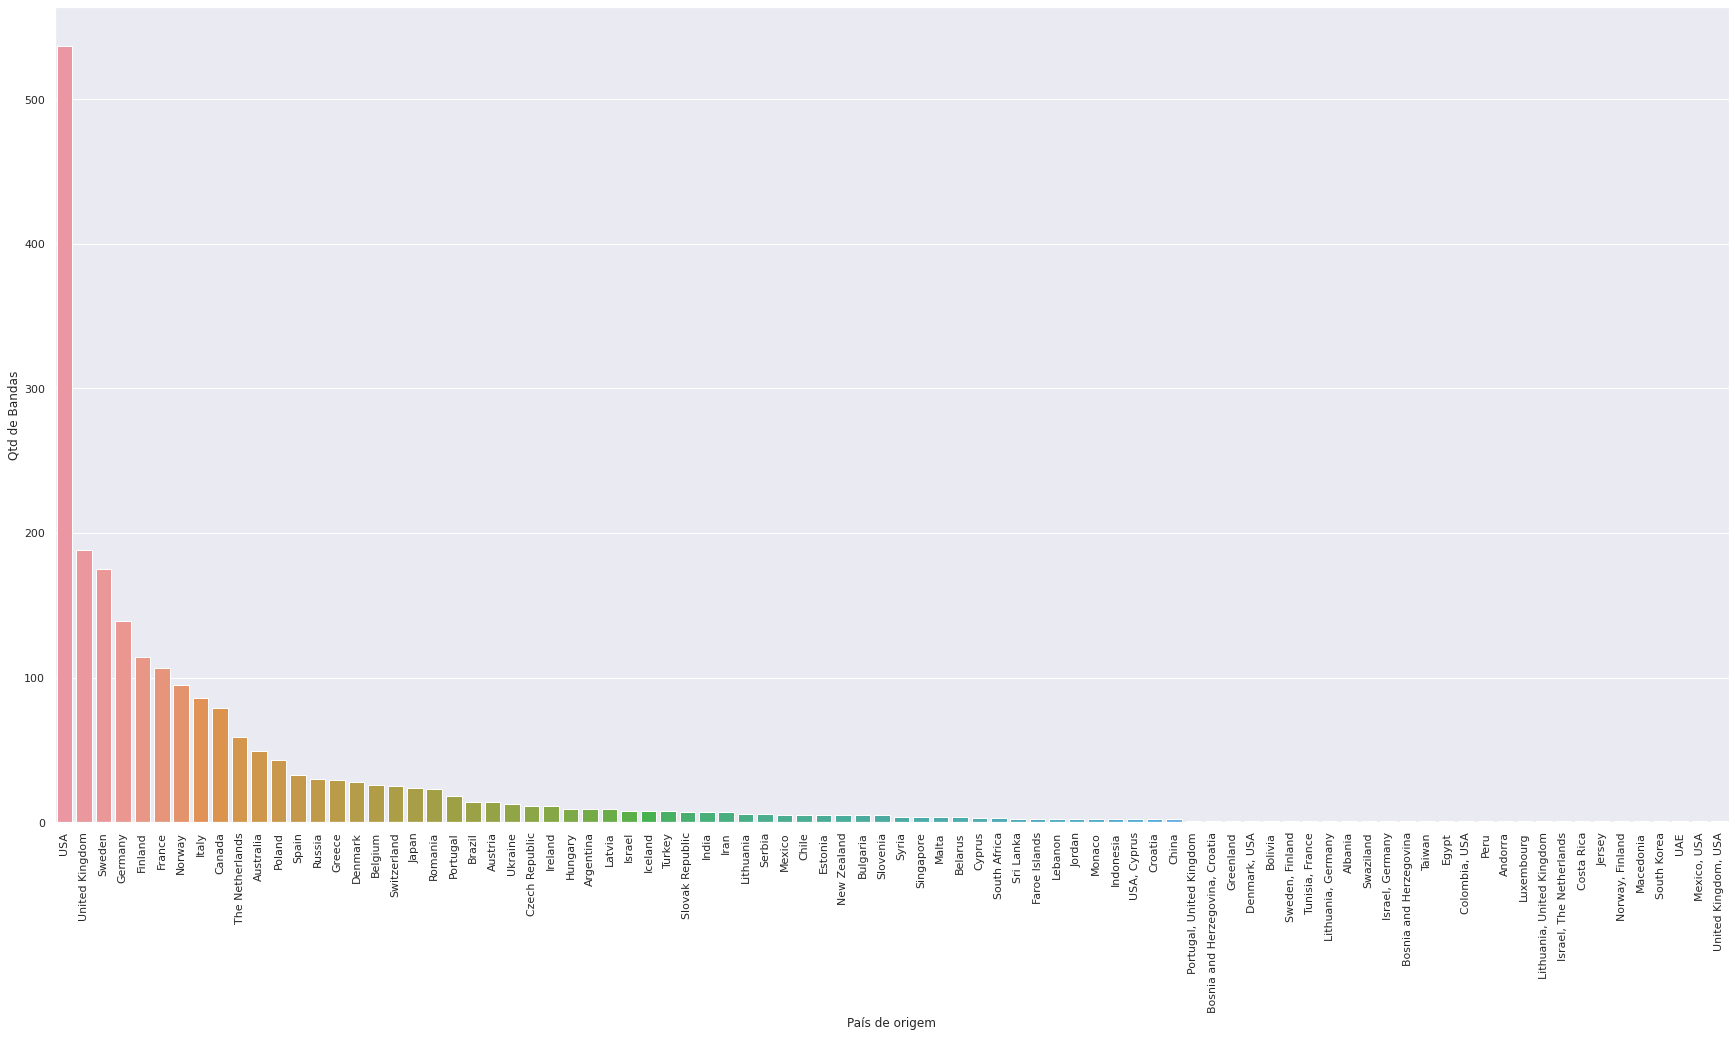

In [496]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
countplot = sns.countplot(data=df, x='origin', order=ordem);
countplot.set(xlabel='País de origem', ylabel='Qtd de Bandas');

## Quantidade de fãs por país de origem

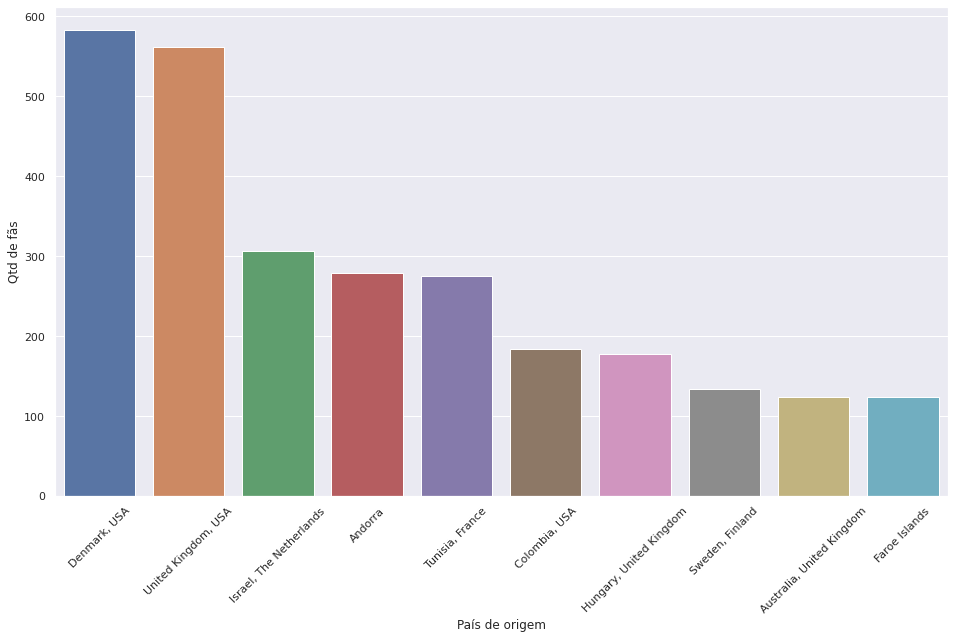

In [471]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
barplot = sns.barplot(data=df_fans_by_country.head(10), x='origin', y='fans')
barplot.set(xlabel='País de origem', ylabel='Qtd de fãs')
plt.show()

## Relação de bandas por paísde origem

In [472]:
print(f"\nNeste dataset, existem {len(df['country'].unique())} países produzindo Metal, assim como {', '.join(df['country'].unique()[0:5])}... \n")


Neste dataset, existem 74 países produzindo Metal, assim como United Kingdom, Sweden, USA, Finland, Germany... 



### TOP #10

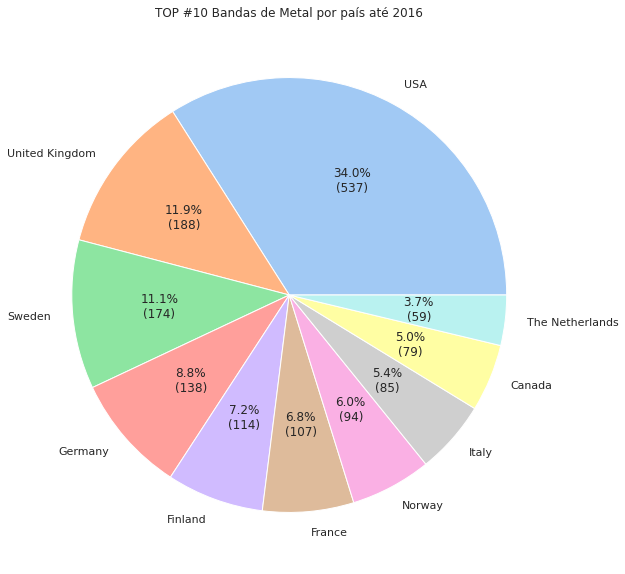

In [473]:
country_top20 = df["origin"].value_counts()[:10]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig = plt.figure(figsize =(20, 10))
plt.title('TOP #10 Bandas de Metal por país até 2016')
colors = sns.color_palette('pastel')
plt.pie(country_top20.values,
        labels = country_top20.keys(),
        colors = colors,
        autopct = lambda pct: func(pct, country_top20.values))

plt.show()

### Escala de 1 milhão de pessoas 🌽🤘

In [474]:
# Exemplo referência: https://ramiro.org/notebook/metal-bands-map/
band_countries = df.iso3.value_counts()
band_countries.name = "bands"
band_countries

USA    539
GBR    189
SWE    176
DEU    139
FIN    114
FRA    107
NOR     96
ITA     86
CAN     79
NLD     59
AUS     49
POL     43
ESP     33
RUS     30
GRC     29
DNK     29
BEL     26
CHE     25
JPN     24
ROU     23
PRT     19
BRA     14
AUT     14
UKR     13
IRL     11
CZE     11
ISR     10
LVA      9
HUN      9
ARG      9
LTU      8
TUR      8
ISL      8
IND      7
IRN      7
SVK      7
MEX      6
SRB      6
EST      5
NZL      5
CHL      5
SVN      5
BGR      5
MLT      4
SYR      4
BLR      4
SGP      4
CYP      3
ZAF      3
LBN      2
MCO      2
CHN      2
IDN      2
JOR      2
FRO      2
BIH      2
HRV      2
LKA      2
SZ       1
BOL      1
JEY      1
TUN      1
COL      1
CRI      1
ALB      1
LUX      1
EGY      1
PER      1
MKD      1
AND      1
KOR      1
ARE      1
TWN      1
GRL      1
Name: bands, dtype: Int64

In [475]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica'] # removendo antártica
world = world.join(band_countries, on='iso_a3')

# soma a contagem de bandas por país e bandas por 1 milhão de pessoas
world['band_ratio'] = world['bands'] / world['pop_est'] * 1_000_000
world.sort_values('band_ratio', ascending=False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,bands,band_ratio
144,339747,Europe,Iceland,ISL,16150.0,"POLYGON ((-1025302.197 6952546.772, -1048898.3...",8,23.546933
151,5491218,Europe,Finland,FIN,224137.0,"POLYGON ((1962483.961 7191405.690, 1968166.420...",114,20.760421
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((840937.999 6223578.056, 869899.710 6...",176,17.669819
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-2627201.180 8280938.168, -2414731.2...",1,17.327119
142,5605948,Europe,Denmark,DNK,264800.0,"MULTIPOLYGON (((782831.650 5836658.459, 733278...",29,5.173077


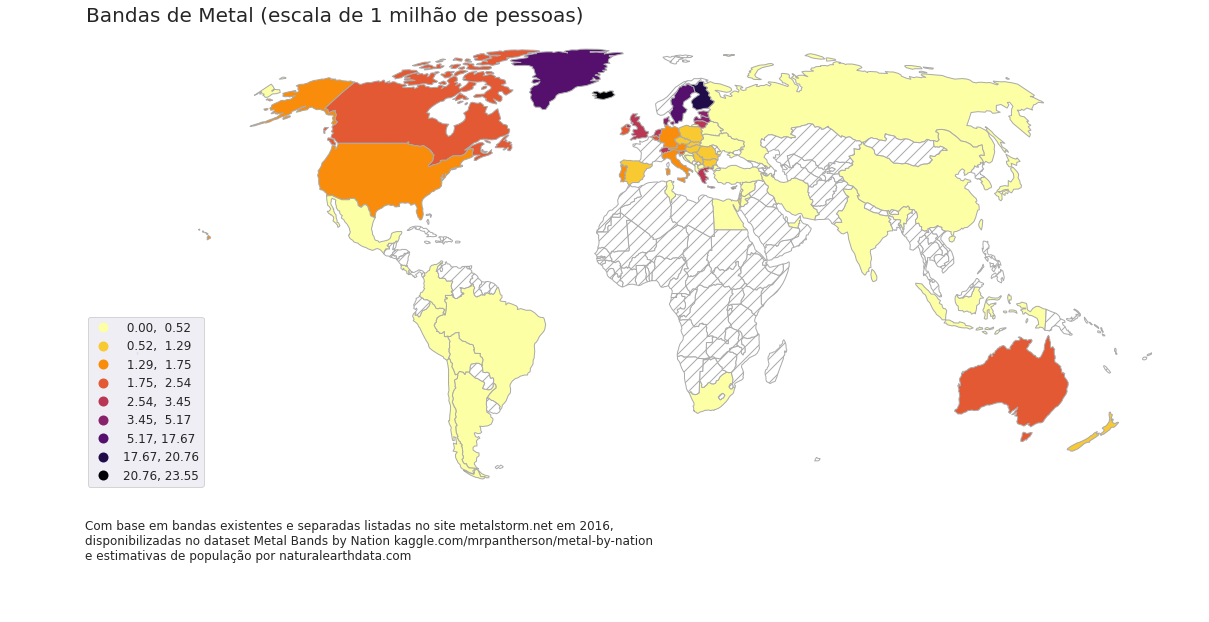

In [476]:
paises_com_bandas = world.dropna(subset=['band_ratio'])
paises_sem_bandas = world[world['band_ratio'].isna()]

ax = paises_com_bandas.plot(column='band_ratio', cmap='inferno_r', figsize=(20, 12), scheme='fisher_jenks', k=9, legend=True, edgecolor='#aaaaaa')
paises_sem_bandas.plot(ax=ax, color='#ffffff', hatch='//', edgecolor='#aaaaaa')

ax.set_title('Bandas de Metal (escala de 1 milhão de pessoas)', fontdict={'fontsize': 20}, loc='left')
description = '''
Com base em bandas existentes e separadas listadas no site metalstorm.net em 2016,\ndisponibilizadas no dataset Metal Bands by Nation kaggle.com/mrpantherson/metal-by-nation\ne estimativas de população por naturalearthdata.com'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()
legend.set_bbox_to_anchor((.11, .4))
legend.prop.set_size(12)

## Relação de bandas por subgênero

In [477]:
#", ".join(df["secondary_style"].unique()[0:5])
print(f"\nNeste dataset, existem {len(df['main_style'].unique())} principais subgêneros e {len(df['secondary_style'].dropna())} bandas que mesclam mais de um subgênero,\nassim como {', '.join(df['secondary_style'].dropna().unique()[0:5])}...\n")


Neste dataset, existem 163 principais subgêneros e 2152 bandas que mesclam mais de um subgênero,
assim como Heavy, Progressive rock, Bay area thrash, Death, Gothic...



In [478]:
pure = {}
mixed = {}
style_df = pd.DataFrame(columns=['Style', 'Pure', 'Mixed'])
for index, band in df.iterrows():
    main_style = band['main_style']
    secondary_style = band['secondary_style']
    if (pd.isna(secondary_style)):
        pure[main_style] = pure.get(main_style, 0) + 1
    else:
        mixed[secondary_style] = mixed.get(secondary_style, 0) + 1


style_df['Style']= mixed.keys()
style_df['Mixed']= style_df['Style'].map(mixed)
style_df['Pure'] = style_df['Style'].map(pure)

style_df = style_df.sort_values(by='Mixed', ascending=False)[:50]

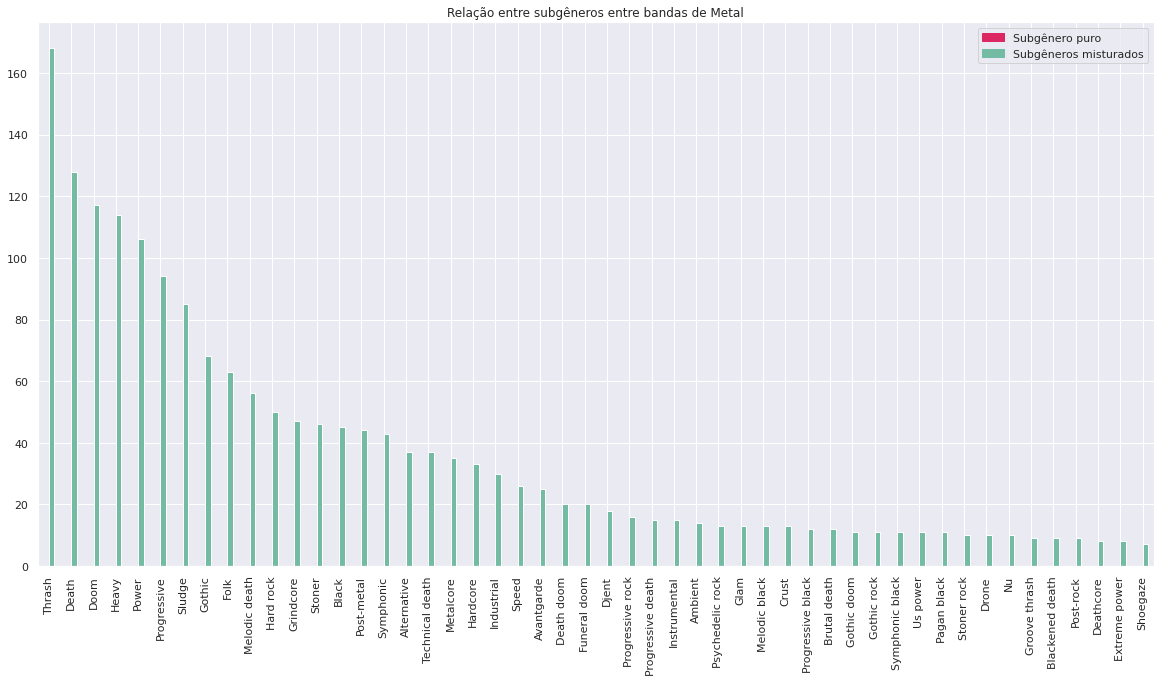

In [479]:
ax = style_df[['Pure', 'Mixed']].plot(kind='bar', color=['#DD2763', '#74BBA4'])
ax.set_xticklabels(style_df['Style'], rotation=90)
plt.title('Relação entre subgêneros entre bandas de Metal')
mixed_legend = mpatches.Patch(color='#DD2763', label='Subgênero puro')
pure_legend = mpatches.Patch(color='#74BBA4', label='Subgêneros misturados')
plt.legend(handles=[mixed_legend, pure_legend])
#plt.figure(figsize=(20,10))

sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1)

## Normalização	e	discretização

In [432]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler()
mms = MinMaxScaler()

# reescalando o ano de formação das bandas com MinMaxScaler, e a coluna de número de fãs com RobustScaler, pois possui muitos outliers 
df['formed_normalizado'] = mms.fit_transform(df[['formed']].values)

df['fans_normalizado'] = rs.fit_transform(df[['fans']].values)

In [433]:
df.head()

,band_name,fans,formed,origin,split,style,main_style,secondary_style,country,iso3,formed_normalizado,fans_normalizado
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,United Kingdom,GBR,0.211538,113.081081
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Sweden,SWE,0.500000,111.783784
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,USA,USA,0.326923,100.027027
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,USA,USA,0.365385,83.621622
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,<NA>,Sweden,SWE,0.461538,82.243243
